In [4]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import seaborn as sns

In [5]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

In [7]:
# Display the shape of the DataFrame (number of rows and columns)
df.shape

(10000, 14)

In [8]:
# Display the column names in the dataset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
# Display the first few rows of the DataFrame for inspection
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# ----------- Data Preparation -------------

In [10]:
# Define input features (selected relevant columns from the dataset)
#input data
x = df[['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
# Define output label (whether the customer exited or not)
#output data
y = df['Exited']

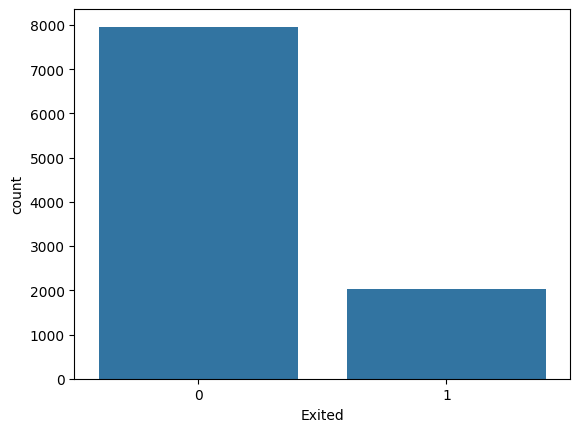

In [65]:
# Plot the count of customers who exited vs those who did not (0 = stayed, 1 = exited)
sns.countplot(x = y);

In [66]:
# Show the count of customers who exited (1) and stayed (0)
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [34]:
#Installing imbalanced module for balance the data
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# ----------- Handling Imbalanced Data -------------

In [35]:
# Import RandomOverSampler to balance the dataset
from imblearn.over_sampling import RandomOverSampler

In [42]:
# Create an instance of RandomOverSampler to oversample the minority class
ros = RandomOverSampler(random_state=0)

In [45]:
# Resample the dataset to balance the number of exited and non-exited customers
x_res, y_res = ros.fit_resample(x, y)

In [46]:
# Check the distribution of the resampled output (balanced now)
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [ ]:
# ----------- Data Normalization -------------

In [47]:
# Import StandardScaler to normalize the feature values
from sklearn.preprocessing import StandardScaler

In [48]:
# Create an instance of StandardScaler to scale the features
scaler = StandardScaler()

In [50]:
# Fit the scaler to the resampled input data and transform it
x_scaled = scaler.fit_transform(x_res)

In [51]:
# Display the normalized data
x_scaled

array([[-0.29877723,  0.08418894, -1.01840607, ...,  0.6512495 ,
         1.08223556,  0.00817382],
       [-0.4103938 , -0.01032629, -1.36135608, ..., -1.53550983,
         1.08223556,  0.20261687],
       [-1.48597169,  0.08418894,  1.03929402, ...,  0.6512495 ,
        -0.92401325,  0.22674468],
       ...,
       [-0.84671313,  1.02934128,  0.01044398, ...,  0.6512495 ,
        -0.92401325,  1.28878188],
       [-0.96847667,  0.65128034, -0.67545605, ..., -1.53550983,
         1.08223556, -1.21851316],
       [-1.5874413 ,  0.74579558,  1.03929402, ...,  0.6512495 ,
         1.08223556,  1.42417217]])

In [ ]:
# ----------- Train-Test Split -------------

In [52]:
# Import train_test_split to split data into training and test sets
from sklearn.model_selection import train_test_split

In [53]:
# Split the data into training and testing sets (75% train, 25% test)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_res, random_state = 0, test_size=0.25)

In [54]:
# Check the shape of the resampled data (input data)
x_res.shape

(15926, 8)

In [55]:
# Check the shape of the testing data (25% of the data)
x_test.shape

(3982, 8)

In [56]:
# Check the shape of the training data (75% of the data)
x_train.shape

(11944, 8)

In [ ]:
# ----------- Building the Neural Network -------------

In [57]:
# Import the Multi-Layer Perceptron Classifier (MLPClassifier) for neural networks
from sklearn.neural_network import MLPClassifier

In [58]:
# Create an instance of the MLPClassifier with 3 hidden layers of 100 neurons each, using 'relu' activation
ann = MLPClassifier(hidden_layer_sizes= (100, 100, 100), random_state=0, max_iter=100, activation='relu')

In [59]:
# Train the neural network model using the training data
ann.fit(x_train, y_train)

C:\Users\ganes\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [60]:
# Predict the output for the test data
y_pred = ann.predict(x_test)

In [ ]:
# ----------- Model Evaluation -------------

In [61]:
# Import necessary evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score

In [62]:
# Show the count of the actual test labels (0 and 1 distribution)
y_test.value_counts()

Exited
1    2001
0    1981
Name: count, dtype: int64

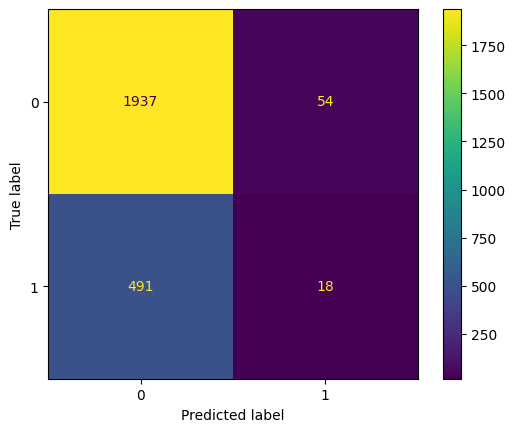

In [30]:
# Display the confusion matrix to understand the performance of the model
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [63]:
# Calculate and display the accuracy score of the model
accuracy_score(y_test, y_pred)

0.865143144148669

In [64]:
# Print the classification report (precision, recall, f1-score) for further performance insights
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1981
           1       0.84      0.91      0.87      2001

    accuracy                           0.87      3982
   macro avg       0.87      0.86      0.86      3982
weighted avg       0.87      0.87      0.86      3982

